In [1]:
!pip install -U diffusers

## Local Inference on GPU
Model page: https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [7]:
pip install -U diffusers transformers accelerate

Using device: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

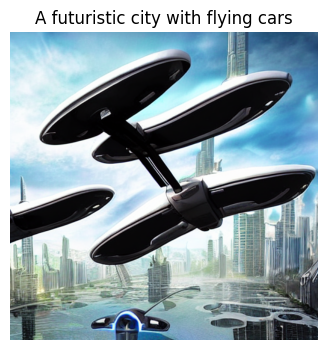

  0%|          | 0/50 [00:00<?, ?it/s]

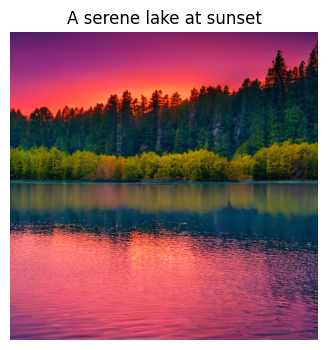

  0%|          | 0/50 [00:00<?, ?it/s]

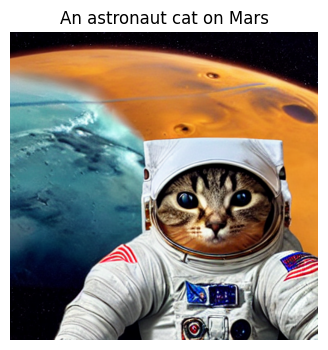

  0%|          | 0/50 [00:00<?, ?it/s]

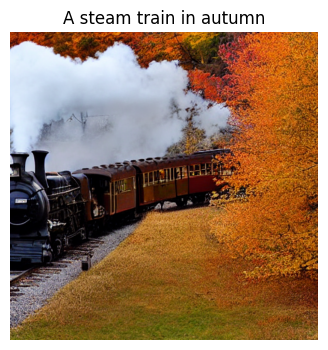

  0%|          | 0/50 [00:00<?, ?it/s]

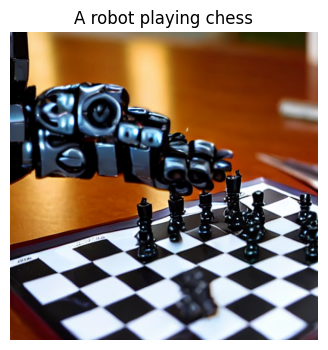

DONE


In [3]:
import torch
from diffusers import StableDiffusionPipeline
import os
from PIL import Image
import matplotlib.pyplot as plt

os.makedirs("synthetic_dataset", exist_ok=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)

pipe.to(device)
pipe.enable_attention_slicing()

prompts = [
    "A futuristic city with flying cars",
    "A serene lake at sunset",
    "An astronaut cat on Mars",
    "A steam train in autumn",
    "A robot playing chess"
]

for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]

    path = f"synthetic_dataset/sample_{i+1}.png"
    image.save(path)

    # DISPLAY
    plt.figure(figsize=(4,4))
    plt.imshow(image)
    plt.axis("off")
    plt.title(prompt)
    plt.show()

print("DONE")
